![Open CV](notebook_diagrams/opencv.png)

# Tutorial for OpenCV
OpenCV is a library for processing images with computer vision algorithms.  Like pandas and numpy, it is extremely important for machine learning, particularly for computer vision.  OpenCV is written primariily in C++, but there are Python wrappers for it that enable for the code to be processed as though it were written in C++.

All the OpenCV array structures are converted to-and-from Numpy arrays. So whatever operations you can do in Numpy, you can combine it with OpenCV.  This makes OpenCV and Numpy extremely useful when used together.  Typically, **OpenCV** is used for loading/saving images, as well as for complex image manipulation (such as detecting objects in images), while **Numpy** is more often used for matrix-like image manipulations, such as rotating or cropping an image. 

In this tutorial, we'll explore the basic functionalities of OpenCV, and how they can be used in computer vision. 

A reference to this documentation can be found [here](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_setup/py_intro/py_intro.html#intro).

## Import Block
Typically you will see `import cv2 as cv` written, but this is just convention.  You can write this import statement in whatever way works best for you.

In [2]:
# We will also be using opencv, an image processing library
! pip install opencv-python
import cv2 as cv

# Import NumPy
import numpy as np 

# We will use os to find specific paths in our directories
import os

# Use for plotting
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread

## Loading Images from OpenCV
OpenCV has efficient and compact functionality built-in for loading images.  **NOTE**: OpenCV loads images in BGR format, rather than RGB.  We can use code below to make sure we load images in RGB format.

In [3]:
# Import image
img_fname = os.path.join("notebook_diagrams","puppy.png")

# Now let's load the image into a numpy array using opencv!
A_BGR = cv.imread(img_fname)
A_RGB = cv.cvtColor(A_BGR, cv.COLOR_BGR2RGB)

print("Data type of loaded image is %s" % (type(A_BGR)))

Data type of loaded image is <class 'numpy.ndarray'>


We can see that after we load the image using **OpenCV**, the image is stored as a Numpy array!  This means we can use all of Numpy's vector, matrix, linear algebra, and mathematical functions that are extremely relevant for many computer vision and image pre-processing tasks.

## Plotting Loaded Images using Matplotlib
After loading our images, we can also visualize what they look like using matplotlib's `imread` function.

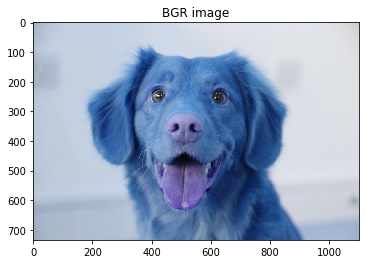

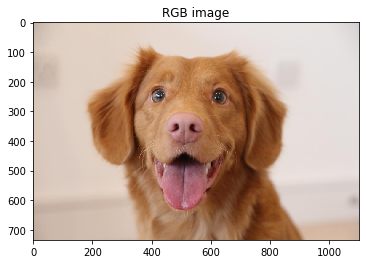

<Figure size 432x288 with 0 Axes>

In [4]:
# Plot the BGR image
plt.imshow(A_BGR)
plt.title("BGR image")
plt.show()
plt.clf()

# Plot the RGB image
plt.imshow(A_RGB)
plt.title("RGB image")
plt.show()
plt.clf()

## Combining Numpy and OpenCV: Color Segmentation
Now that we've seen one way in which we can use numpy and OpenCV together, we can use the two libraries together to perform more complex operations on imagery.  One of these operations is known as color segmentation, which we will explore below.

In [7]:
# Remember A_RGB is our image
IMG = A_RGB

# define range of blue color in HSV
lower_blue = np.array([110,50,50])
upper_blue = np.array([130,255,255])

# Threshold the HSV image to get only blue colors
mask = cv.inRange(IMG, lower_blue, upper_blue)

# Bitwise-AND mask and original image
res = cv.bitwise_and(IMG, IMG, mask= mask)

plt.imshow(IMG)
plt.title("Original Image")
plt.show()
plt.clf()

plt.imshow(mask)
plt.title("Binary Mask")
plt.show()
plt.clf()


plt.imshow(res)
plt.title("Original Image")
plt.show()
plt.clf()


## Processing Image Data with Numpy and OpenCV
As discussed in the numpy tutorial, another aspect of numpy that makes it really important for machine learning and computer vision is its ability to process and transform large matrices and tensors (matrices of any generalized size).  We'll go through a simple example here with loading and processing an image, but we will see in future lectures and tutorials that numpy plays a crucial role in the computer vision pipeline.

Here, we will also use the **OpenCV** library for loading an image.

Type of A: <class 'numpy.ndarray'>
Shape of Image: (300, 452, 3)


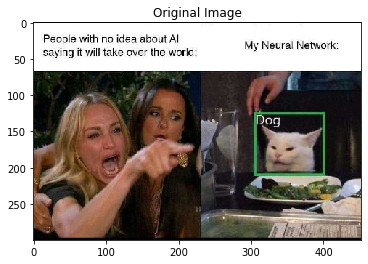

Shape of cat-dog: (125, 125, 3)


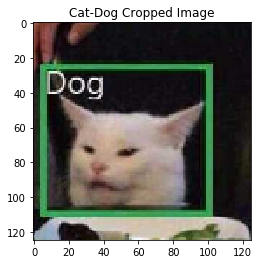

Shape of cat-dog downsampled 2x: (63, 63, 3)


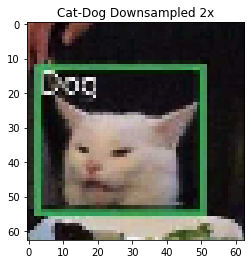

Shape of cat-dog downsampled 4x: (32, 32, 3)


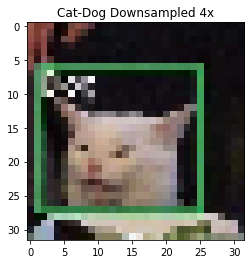

In [5]:
# Load an image using opencv - Tutorial on this library tomorrow!
img_fpath = os.path.join("notebook_diagrams", "numpy_example.png")
A = cv.imread(img_fpath)
A = cv.cvtColor(A, cv.COLOR_BGR2RGB)
print("Type of A: %s" % (type(A)))
print("Shape of Image: {}".format(A.shape))

# Show the image
plt.imshow(A)
plt.title("Original Image")
plt.show()

# Now crop image
cat_dog = A[100:225,300:425]
print("Shape of cat-dog: {}".format(cat_dog.shape))
plt.imshow(cat_dog)
plt.title("Cat-Dog Cropped Image")
plt.show()

# Now downsample cat-dog - 2x
cat_dog_downsampled_2x = cat_dog[::2, ::2, ::]
print("Shape of cat-dog downsampled 2x: {}".format(cat_dog_downsampled_2x.shape))
plt.imshow(cat_dog_downsampled_2x)
plt.title("Cat-Dog Downsampled 2x")
plt.show()

# 4x
cat_dog_downsampled_4x = cat_dog[::4, ::4, ::]
print("Shape of cat-dog downsampled 4x: {}".format(cat_dog_downsampled_4x.shape))
plt.imshow(cat_dog_downsampled_4x)
plt.title("Cat-Dog Downsampled 4x")
plt.show()